In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
data= pd.read_csv(r"C:\Users\Rohan\Downloads\KaggleV2-May-2016.csv")
data


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:

data['ScheduledDay']= pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']= pd.to_datetime(data['AppointmentDay'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [6]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Text(0.5, 1.0, 'No-show by Age')

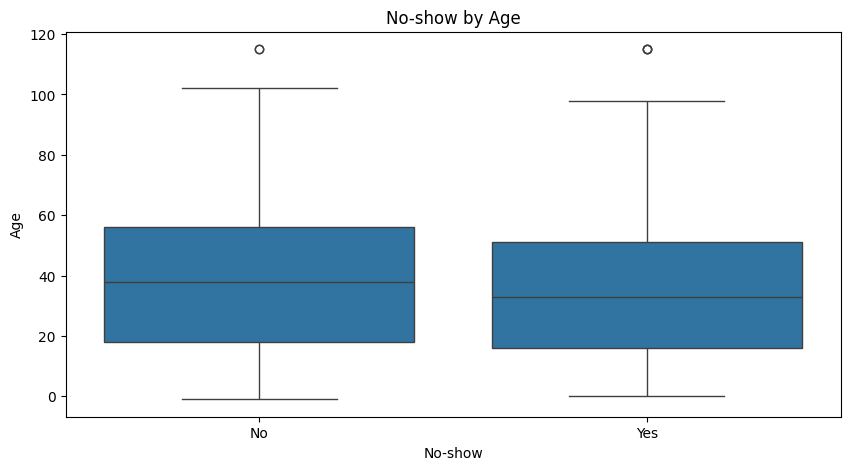

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='No-show', y='Age', data=data)
plt.title('No-show by Age')


## we can see that the data is clean and now we can perform the Modelling

### For Decision tree Model we have to select only the numerical data so inorder to select the categorical feature that might play an important role in modelling we convert the categorical feature into a numeric

In [8]:
data_new= data.drop(columns= ['PatientId','AppointmentID','ScheduledDay','AppointmentDay'])
data_new

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
data_new['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [10]:
labelenc=LabelEncoder()
data_new['Neighbourhood']= labelenc.fit_transform(data_new['Neighbourhood'])
data_new['Neighbourhood']

0         39
1         39
2         45
3         54
4         39
          ..
110522    43
110523    43
110524    43
110525    43
110526    43
Name: Neighbourhood, Length: 110527, dtype: int64

In [11]:
data_new['Gender']= labelenc.fit_transform(data['Gender'])
data_new['No-show']= labelenc.fit_transform(data['No-show'])
data_new.head(10)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0
5,0,76,58,0,1,0,0,0,0,0
6,0,23,25,0,0,0,0,0,0,1
7,0,39,25,0,0,0,0,0,0,1
8,0,21,1,0,0,0,0,0,0,0
9,0,19,12,0,0,0,0,0,0,0


In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Gender         110527 non-null  int64
 1   Age            110527 non-null  int64
 2   Neighbourhood  110527 non-null  int64
 3   Scholarship    110527 non-null  int64
 4   Hipertension   110527 non-null  int64
 5   Diabetes       110527 non-null  int64
 6   Alcoholism     110527 non-null  int64
 7   Handcap        110527 non-null  int64
 8   SMS_received   110527 non-null  int64
 9   No-show        110527 non-null  int64
dtypes: int64(10)
memory usage: 8.4 MB


Text(0.5, 1.0, 'Correlation Matrix')

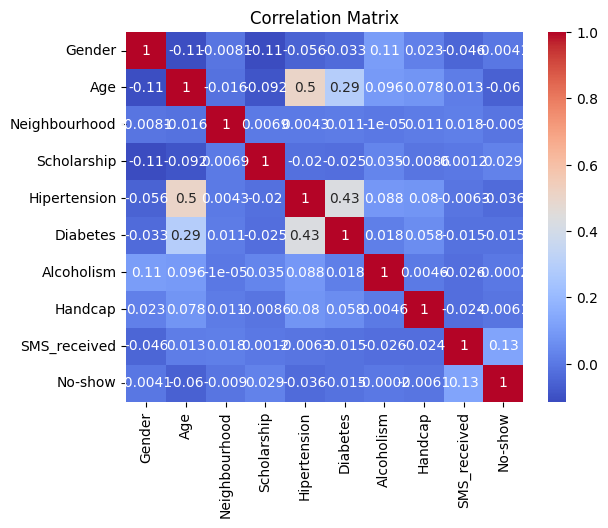

In [39]:
cor=data_new.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


## Now lets split the data and model it

In [13]:
x= data_new.drop(columns=['No-show'])
y=data_new['No-show']

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=1)

In [15]:
from sklearn.model_selection import cross_val_score
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model,x , y, cv=5)
    print(f"Depth: {depth}, Mean CV Accuracy: {np.mean(scores):}")

Depth: 1, Mean CV Accuracy: 0.7980674405994289
Depth: 2, Mean CV Accuracy: 0.7980674405994289
Depth: 3, Mean CV Accuracy: 0.7980674405994289
Depth: 4, Mean CV Accuracy: 0.7980674405994289
Depth: 5, Mean CV Accuracy: 0.7980674414180056
Depth: 6, Mean CV Accuracy: 0.7977598174803464
Depth: 7, Mean CV Accuracy: 0.7970631650307858
Depth: 8, Mean CV Accuracy: 0.7965474470612722
Depth: 9, Mean CV Accuracy: 0.7958688810608867
Depth: 10, Mean CV Accuracy: 0.7948555409846654


### we can see there the mean accuracy is same for the first 4 and after that its starts to decrease therefore we can keep the DEPTH as 3 o 4

In [30]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best')
prediction= tree.fit(x_train,y_train)
y_pred= prediction.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(22106,))

In [25]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print(f'the accracy of the model is:  {accuracy*100}%')

the accracy of the model is:  80.02352302542296%


In [26]:
 tree.feature_importances_

array([0.        , 0.37083412, 0.02562936, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.60353652])

## Visuals for determining on what basis does patients visit the hospital on appointed date

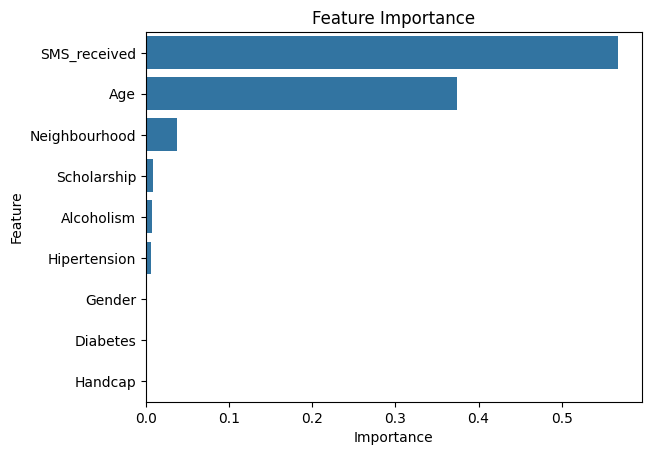

In [29]:
import seaborn as sns

feature_importance = tree.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Plot
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()


### We can say that the patiets who Recieved the message tend to visit the hospital on appointed date

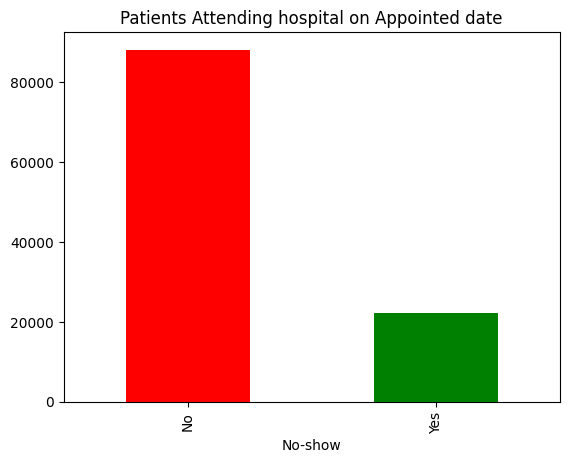

In [20]:
data['No-show'].value_counts().plot(kind='bar',color=['r','g'])
plt.title('Patients Attending hospital on Appointed date')
plt.show()

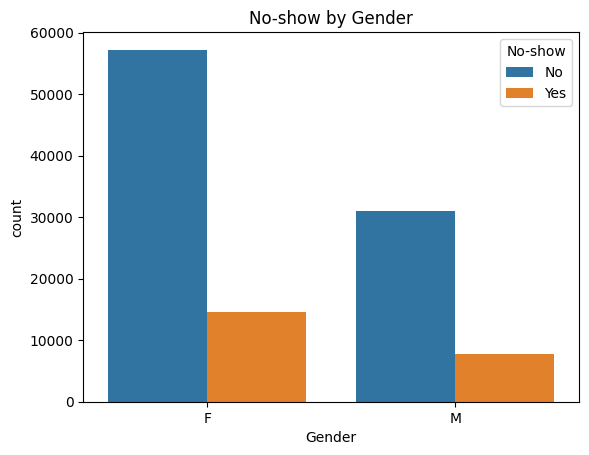

In [42]:
sns.countplot(x='Gender', hue='No-show', data=data)
plt.title('No-show by Gender')
plt.show()

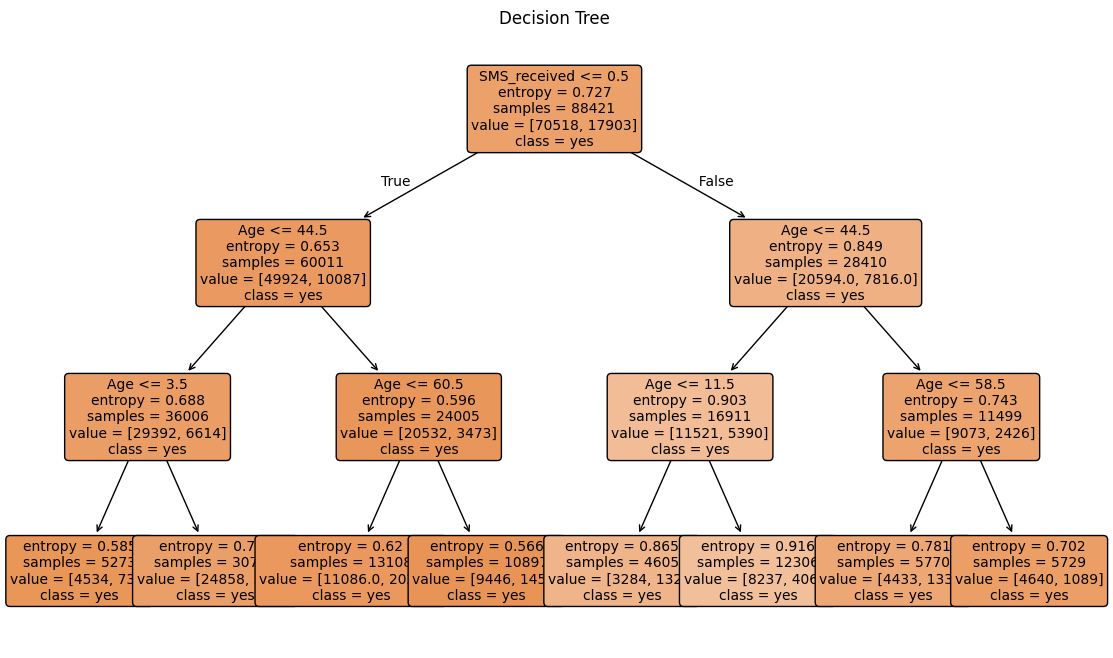

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 8))
plot_tree(tree,
    filled=True,
    feature_names=x.columns,
    class_names=['yes','no'],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree")
plt.show()